<a href="https://colab.research.google.com/github/heidilyu/Advanced-Calculus-/blob/main/PreLab_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pre-Lab 1.3

Goals:
1. Import packages.  Draw graphs with the `matplotlib` and `numpy` packages.
2. Write functions, use functions and use methods.
3. Use Newton's method to approximate the zeros of a mathematical function.


## The Numpy and Matplotlib Packages

A *package* is a set of functions, object types and methods that someone else has written and that we can import into our code.  There are packages for all kinds of applications.  We will use two packages in this lab.

* `matplotlib` draws graphs for us.
* `numpy` deals with arrays, which are like lists that play well with algebra.

The first step is to issue an `import` instruction.  The simplest import is to import the entire package.

In [ ]:
import matplotlib
import numpy


Now we have access to all the methods of matplotlib and numpy.  The commands for each are methods of the package.  To make an array, we use the method `numpy.array()`.  Look at the fun things we can do with arrays!

In [ ]:
x=numpy.array([2,3,4,5,6])
print(3*x)
print(x**2+1)

[ 6  9 12 15 18]
[ 5 10 17 26 37]


Having to type out `numpy` to call the methods of numpy is too much work for lazy programmers.  `matplotlib` is even worse.  It has so many methods, that they are oragnized into sublists.  Just plotting a function requires us to use the `matplotlib.pyplot.plot()` method.  To save time, we can use aliases when we import packages.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Now let's draw a simple graph.  The `matplotlib.pyplot.plot()` method (which we will call using the alias `plt.plot()`) requires two arguments.  The first argument is the set of x-values to graph.  The second is the set of y-values corresponding to each x-value.  Numpy arrays are natural objects to use for these arguments, since we can apply a function to the entire array of x-values to get an array of y-values.  Here is the code to accomplish this.

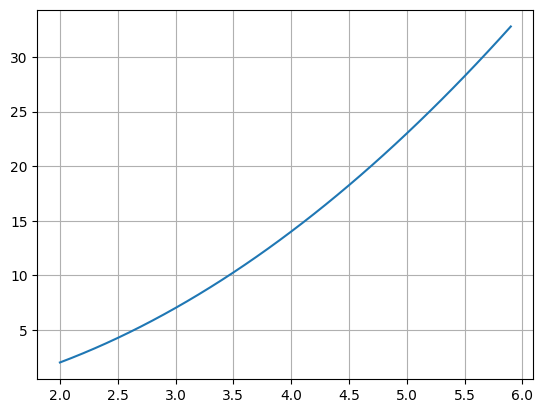

In [ ]:
#the np.arange() method makes an array of numbers from 2 to 6, spaced 0.1 apart
x=np.arange(2,6,0.1)

# We define a function that we will graph.
# It has a number as its argument and returns a number
def f(x):
  return x**2-2

# Now we plot x and f(x) with plt.plot()
plt.plot(x, f(x))
# add a grid with the plt.grid() method
plt.grid()
# once we have put everything we want in the plot, we show it with plt.show()
plt.show()

### Exercise 1

* Define an array of values from $-2$ to $2$.
* Define a function that returns $x^4-3x^2+2$.
* Produce a graph of your function.

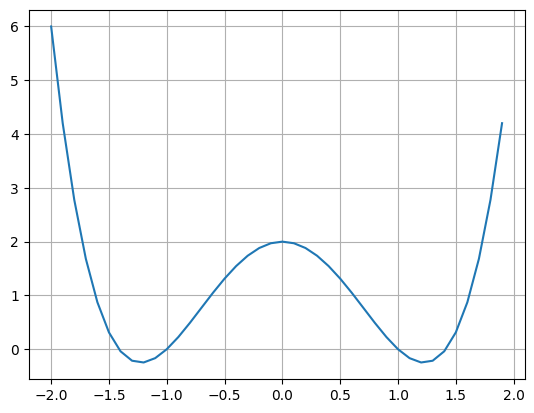

In [ ]:
x=np.arange(-2,2,0.1)


def f(x):
  return x**4-3*x**2+2

plt.plot(x, f(x))
plt.grid()
plt.show()

## Newton's Method

You probably know that the function $f(x)=x^2-2$ has an $x$-intercept at $\sqrt{2}$, but that doesn't help us if we don't know how big $\sqrt{2}$ is.  Newton (and others) came up with a way to use the linearization of $f$ to approximate its $x$-intercepts.

Suppose we think the $x$-intercept is somewhere near $2$.  We can write the linearization of $f(x)$ at $2$.  Remember the linearization (or tangent line) at $a$ is

$$L(x)=f(a)+f'(a)(x-a)$$

### Exercise 2
Write a code cell that
* Defines a function f(x) that returns x^2-2
* Defines a function L(x) that returns the linearization of f at a=2.
* Assigns an array of values from 0 to 4 to a variable `x`
* Plots both `f(x)` and `L(x)` on a single plot. You'll want to call `plt.plot()` once for each function before you `plt.show()`.

If you've done this correctly, you should have a graph of $y=f(x)$ along with its tangent line at $a=2$.

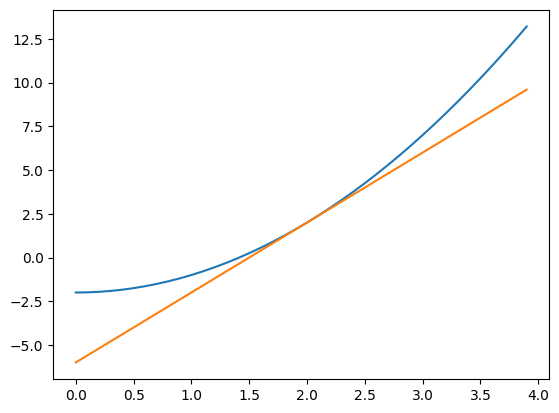

In [ ]:
def f(x):
  return x**2-2

a = 2
f_a = f(a)
f_prime_a = 2*a

def L(x):
  return f_a + f_prime_a*(x-a)

x=np.arange(0,4,0.1)

plt.plot(x, f(x))
plt.plot(x, L(x))

$a=2$ was a reasonably close guess for the $x$-intercept of $f(x)$, but look at where $L(x)$ meets the $x$-axis.  This is a better guess. The tangent line is close to the graph $y=f(x)$, so their $x$-intercepts should be close as well.  

$$\begin{align*}
0&=2+4(x−2)\\
-2&=4(x−2)\\
-\frac{1}{2}&=x-2\\
\frac{3}{2}&=x
\end{align*}$$

The idea of Newton's method is
* Take a guess $a$
* Write the linearization at that guess
* Solve for the $x$-intercept of that linearization
* Use that intercept as a better guess $a$
* Write the linearization at that guess
* Solve for the $x$-intercept of that linearization
* Use that intercept as a better guess $a$
* and so on

As our guesses get better and better, we can make them indistiguishably close to the true $x$-intercept of $y=f(x)$.  Repeating these steps over and over can be tedious, so let's write a general formula that works for any function $f(x)$ and for any guess $a$.

$$\begin{align*}
L(x)&=f(a)+f'(a)(x-a)\\
\text{Set }0&=f(a)+f'(a)(x-a)\\
-f(a)&=f'(a)(x-a)\\
-\frac{f(a)}{f'(a)}&=x-a\\
a-\frac{f(a)}{f'(a)}&=x
\end{align*}$$

### Exercise 3
We will write a function in a code cell to take a guess $a$ and produce a new guess. Our formula requires us to compute $f(a)$ and $f'(a)$.  We already have an $f(a)$.
* Define a function `df(a)` that returns `2a`, the derivative of $x^2-2$.
* Define a function `new(a)`. It should return $$a-\frac{f(a)}{df(a)}$$
* Test your function by computing `new(2)`.  It should return `1.5`.

Now all that is left is to apply the function over and over.  We will learn efficient ways to handle this in the future, but for now we can just write the composition.

In [ ]:
def df(a):
  return 2*a

def new(a):
  return a-f(a)/df(a)

first_guess = new(2)
second_guess = new(first_guess)
print(second_guess)

new(new(2))


1.4166666666666667


1.4166666666666667

This applies `new()` to `2`, then takes the returned value and applies `new()` to it again.

### Exercise 4
1. Write a line of code that applies `new()` to `2` ten times (copy/paste can be your friend here).  If it is the last line in the cell, it should automtically print the output (otherwise you can use a `print()` function).
2. Go find a calculator you trust and evaluate the square root of 2.  You should recall that this is the actual intercept of $y=x^2-2$. Your answer should be very close to the value approximatedf by Newton's method.

In [ ]:
guess = 2

for _ in range(10):
  guess = new(guess)

guess

1.414213562373095